<h1>Intergrated CA2 - Data Visualization & Machine Learning for Business</h1>

Importing all the necessary liabraries

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Uploading the Anime dataset for use in Content Based Filtering

In [55]:
anime = pd.read_csv("Anime_data.csv")

Getting the first 5 rows of the dataset to get a glimpse and understanding of my data to be able to make sense of it

In [57]:
anime.head(5)

,Name,Type,Rating,Rank,Description,Tags,NTags
0,The Apothecary Diaries,TV\r\n(14+ eps),"4.589 out of 5 from 2,728 votes",Rank #1,"In the East is a land ruled by an emperor, who...","{'Maids', 'Romance', 'Doctors', 'Political', '...","{'Mature Themes,', 'Prostitution'}"
1,Heaven Official's Blessing 2nd Season,Web\r\n(11+ eps x 26 min),4.578 out of 5 from 491 votes,Rank #2,When Xie Lian is sent on a mission to Ghost Ci...,"{'Romance', 'Royalty', 'Based on a Web Novel',...","{'Physical Abuse', 'Explicit Violence,'}"
2,Fullmetal Alchemist: Brotherhood,TV\r\n(64 eps),"4.57 out of 5 from 83,697 votes",Rank #3,The foundation of alchemy is based on the law ...,"{'Military', 'Fantasy', 'Siblings', 'Death of ...","{'Domestic Abuse', 'Violence,', 'Animal Abuse,..."
3,Fruits Basket the Final Season,TV\r\n(13 eps),"4.561 out of 5 from 9,674 votes",Rank #4,The final arc of Fruits Basket.,"{'Romance', 'Dysfunctional Families', 'Fantasy...","{'Suicide,', 'Emotional Abuse,', 'Domestic Abu..."
4,Demon Slayer: Kimetsu no Yaiba - Entertainment...,TV\r\n(11 eps),"4.558 out of 5 from 24,057 votes",Rank #5,Tanjiro and his friends accompany the Hashira ...,"{'Siblings', 'Swordplay', 'Historical', 'Based...",{'Explicit Violence'}


Checking the number of rows and columns for the anime dataset

In [58]:
anime.shape

(2851, 7)

Checking for duplicates from the anime data

In [59]:
anime.duplicated().sum()

0

Checking for any missing values from the dataset

In [60]:
anime.isnull().sum()

Name              0
Type              0
Rating            0
Rank              0
Description       0
Tags              0
NTags          2119
dtype: int64

In [61]:
2119/2851*100

74.32479831638021

Dropping the NTags column because it has over 70% of the data missing and I do not have any use for it.

In [64]:
anime.drop('NTags', axis = 1, inplace = True)

In [65]:
anime.head(1)

,Name,Type,Rating,Rank,Description,Tags
0,The Apothecary Diaries,TV\r\n(14+ eps),"4.589 out of 5 from 2,728 votes",Rank #1,"In the East is a land ruled by an emperor, who...","{'Maids', 'Romance', 'Doctors', 'Political', '..."


Checking the data types from the Anime dataset

In [66]:
anime.dtypes

Name           object
Type           object
Rating         object
Rank           object
Description    object
Tags           object
dtype: object

Getting the basic statistics of the Anime dataset

In [69]:
anime.describe()

,Name,Type,Rating,Rank,Description,Tags
count,2851,2851,2851,2851,2851,2851
unique,2842,743,2821,2825,2433,2659
top,Memory of Chang'an 2nd Season,TV\r\n(12 eps),3.726 out of 5 from 15 votes,Rank #809,No synopsis yet - check back soon!,{'Vocaloid'}
freq,2,403,4,3,398,9


## Content Based Filtering - Using The Anime Dataset

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


anime['desc_blob'] = anime['Description'] + ' ' + anime['Tags']


tfidf = TfidfVectorizer(stop_words = 'english', max_features = 5000)
tfidf_matrix = tfidf.fit_transform(anime['desc_blob'])


anime_sim = cosine_similarity(tfidf_matrix)


anime_sim_df = pd.DataFrame(anime_sim, 
                            index=anime['Name'],
                            columns=anime['Name'])


def anime_content_recs(anime_name, topn=5):
    if anime_name not in anime_sim_df.index:
        return []
    sims = anime_sim_df.loc[anime_name].nlargest(topn + 1).iloc[1:]
    return list(sims.index)

In [78]:
anime['Name'].shape[0]

2851

In [79]:
'Naruto' in anime['Name'].values

True

Test

In [81]:
recommended_anime = anime_content_recs("Naruto", topn=5)
print("Recommended anime:", recommended_anime)

Recommended anime: ['Boruto: Naruto the Movie', 'Naruto Shippuden Movie 4: The Lost Tower', 'Road of Naruto', 'Naruto Shippuden Movie 3: The Will of Fire', 'Naruto Shippuden Movie 2: Bonds']


In [82]:
def anime_content_recs_with_scores(anime_name, topn=5):
    if anime_name not in anime_sim_df.index:
        return []
    sims = anime_sim_df.loc[anime_name].nlargest(topn + 1).iloc[1:]
    return list(zip(sims.index, sims.values))

recommended_with_scores = anime_content_recs_with_scores("Naruto", topn=5)
print("Recommendations with similarity scores:", recommended_with_scores)

Recommendations with similarity scores: [('Boruto: Naruto the Movie', 0.4893811848367998), ('Naruto Shippuden Movie 4: The Lost Tower', 0.4167165983537868), ('Road of Naruto', 0.35515477922896743), ('Naruto Shippuden Movie 3: The Will of Fire', 0.3541355034891287), ('Naruto Shippuden Movie 2: Bonds', 0.34021714745416454)]


Testing with multiple titles

In [86]:
titles_to_test = ["Naruto", "Attack on Titan", "Death Note"]
for title in titles_to_test:
    print(f"\nRecommendations for {title}:")
    print(anime_content_recs(title, topn=5))


Recommendations for Naruto:
['Boruto: Naruto the Movie', 'Naruto Shippuden Movie 4: The Lost Tower', 'Road of Naruto', 'Naruto Shippuden Movie 3: The Will of Fire', 'Naruto Shippuden Movie 2: Bonds']

Recommendations for Attack on Titan:
['Attack on Titan 3rd Season', 'Attack on Titan Movie 2: The Wings of Freedom', 'Attack on Titan Movie 1: Crimson Bow and Arrow', 'Attack on Titan 2nd Season', 'Attack on Titan Movie 4: Chronicle']

Recommendations for Death Note:
["Death Note Rewrite 2: L's Successors", 'Death Note Rewrite 1: Visions of a God', 'Angels of Death (Web)', 'The Garden of Sinners Remix: Gate of Seventh Heaven', "Problem Children Are Coming From Another World, Aren't They? OVA"]


## Collaborative Filtering Using the the Amazon Dataset("ratings_Beauty.csv")

In [97]:
amazon = pd.read_csv("ratings_Beauty.csv")

In [98]:
amazon.head(5)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [99]:
amazon.shape

(2023070, 4)

In [100]:
amazon.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [101]:
amazon.duplicated().sum()

0

In [102]:
amazon.dtypes

UserId        object
ProductId     object
Rating       float64
Timestamp      int64
dtype: object

### Preprocessing for Collaborative Filtering

In [104]:
print("Unique users:", amazon["UserId"].nunique())
print("Unique items:", amazon["ProductId"].nunique())
print("Rows:", len(amazon))

Unique users: 1210271
Unique items: 249274
Rows: 2023070


### Preparing the User-Item Matrix

In [109]:
from scipy.sparse import csr_matrix

user_codes = amazon['UserId'].astype('category').cat.codes
item_codes = amazon['ProductId'].astype('category').cat.codes

n_users = user_codes.nunique()
n_items = item_codes.nunique()

ratings_sparse = csr_matrix(
    (amazon['Rating'].values,
     (user_codes.values, item_codes.values)),
    shape=(n_users, n_items)
)

#### User-User CF

In [110]:
from sklearn.neighbors import NearestNeighbors

user_knn = NearestNeighbors(
    metric='cosine',
    algorithm='brute',
    n_neighbors=21   
)
user_knn.fit(ratings_sparse)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=21)

Getting Top K similar users

In [111]:
def get_similar_users(user_idx, k=20):
    distances, indices = user_knn.kneighbors(
        ratings_sparse[user_idx],
        n_neighbors=k+1
    )
    
    sims = 1 - distances[0][1:]
    users = indices[0][1:]
    return users, sims

Predicting  Rating (User-User CF)

In [113]:
def predict_user_user(user_idx, item_idx, k=20):
    neighbors, sims = get_similar_users(user_idx, k)
    
    neighbor_ratings = ratings_sparse[neighbors, item_idx].toarray().flatten()
    
    mask = neighbor_ratings > 0
    if mask.sum() == 0:
        return np.nan

    return np.dot(sims[mask], neighbor_ratings[mask]) / sims[mask].sum()

User-User CF Testing - to test the model on an actual user and product pair

In [114]:
test_user = 100   
test_item = 250  

pred = predict_user_user(test_user, test_item)
print("Predicted rating:", pred)

Predicted rating: nan


#### Item-Item CF

In [115]:
item_knn = NearestNeighbors(
    metric ='cosine',
    algorithm ='brute',
    n_neighbors =21
)
item_knn.fit(ratings_sparse.T)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=21)

Get Top-K Smilar Items

In [116]:
def get_similar_items(item_idx, k = 20):
    distances, indices = item_knn.kneighbors(
        ratings_sparse.T[item_idx],
        n_neighbors = k + 1
    )
    sims = 1 - distances[0][1:]
    items = indices[0][1:]
    return items, sims

Predict Rating(Item-Item CF)

In [117]:
def predict_item_item(user_idx, item_idx, k=20):
    items, sims = get_similar_items(item_idx, k)

    user_ratings = ratings_sparse[user_idx, items].toarray().flatten()
    mask = user_ratings > 0

    if mask.sum() == 0:
        return np.nan

    return np.dot(sims[mask], user_ratings[mask]) / sims[mask].sum()

Item-Item CF Testing

In [118]:
pred_item = predict_item_item(test_user, test_item)
print("Item-item CF prediction:", pred_item)

Item-item CF prediction: nan


# SECTION 2: Market Basket Analysis

I had to get a different dataset because the ones I have are not the best for performing a Market Basket Analysis.

Uploading a Bakery dataset in order to perform a Market Basket Analysis

In [172]:
bakery = pd.read_csv("Bakery.csv")

In [173]:
bakery.head(5)

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


Checking the size of the Bakery dataset

In [174]:
bakery.shape

(20507, 5)

Checking for any missing values

In [175]:
bakery.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

Checking for any nan values in the dataset

In [176]:
bakery.isna().any().any()

False

In [177]:
bakery = bakery.dropna()

Checking if the dataset has any duplicates

In [178]:
bakery.duplicated().sum()

1620

Removing all duplicates from the dataset

In [179]:
bakery.drop_duplicates()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
5,3,Cookies,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend


bakery.info()

In [181]:
bakery['Items'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

Grouping transactions

In [183]:
transactions = bakery.groupby("TransactionNo")["Items"].apply(list).tolist()

One Hot Encoding

In [184]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

df_encoded = pd.DataFrame(te_array, columns=te.columns_)
df_encoded.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Applying Apriori

In [185]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets_apriori = apriori(df_encoded, min_support = 0.01, use_colnames = True)

rules_apriori = association_rules(frequent_itemsets_apriori, metric = "lift", min_threshold = 1.0)
rules_apriori = rules_apriori.sort_values(by = "lift", ascending = False)
rules_apriori.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
40,(Cake),"(Tea, Coffee)",0.103856,0.049868,0.010037,0.096643,1.937977,1.0,0.004858,1.051779,0.540090,0.069853,0.049230,0.148957
39,"(Tea, Coffee)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,1.0,0.004858,1.121962,0.509401,0.069853,0.108705,0.148957
8,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,1.0,0.005354,1.114125,0.498236,0.075683,0.102434,0.152760
9,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,1.0,0.005354,1.057910,0.523553,0.075683,0.054740,0.152760
11,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,1.0,0.008959,1.075372,0.439556,0.106736,0.070090,0.197779


Applying FP-Growth

In [186]:
from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets_fpgrowth = fpgrowth(df_encoded, min_support = 0.01, use_colnames = True)

rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric = "lift", min_threshold = 1.0)
rules_fpgrowth = rules_fpgrowth.sort_values(by = "lift", ascending=False)
rules_fpgrowth.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
24,(Cake),"(Tea, Coffee)",0.103856,0.049868,0.010037,0.096643,1.937977,1.0,0.004858,1.051779,0.540090,0.069853,0.049230,0.148957
23,"(Tea, Coffee)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,1.0,0.004858,1.121962,0.509401,0.069853,0.108705,0.148957
2,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,1.0,0.005354,1.114125,0.498236,0.075683,0.102434,0.152760
3,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,1.0,0.005354,1.057910,0.523553,0.075683,0.054740,0.152760
21,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,1.0,0.008959,1.075372,0.439556,0.106736,0.070090,0.197779


Example insights from rules

In [187]:
rules_apriori[['antecedents','consequents','support','confidence','lift']].head()

,antecedents,consequents,support,confidence,lift
40,(Cake),"(Tea, Coffee)",0.010037,0.096643,1.937977
39,"(Tea, Coffee)",(Cake),0.010037,0.201271,1.937977
8,(Hot chocolate),(Cake),0.011410,0.195652,1.883874
9,(Cake),(Hot chocolate),0.011410,0.109868,1.883874
11,(Tea),(Cake),0.023772,0.166667,1.604781


Apriori rules coverage (approx): 865.27%


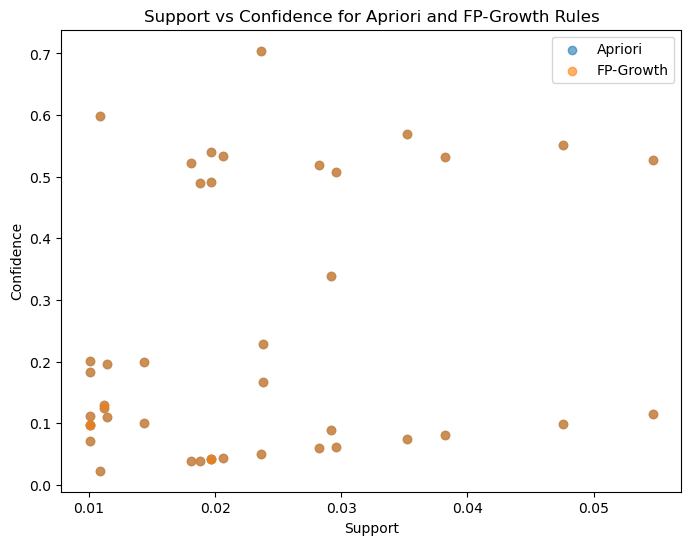

Number of Apriori rules: 42
Number of FP-Growth rules: 42
Identical rules between Apriori and FP-Growth: True

Top 5 Apriori rules by lift:
        antecedents      consequents   support  confidence      lift
40           (Cake)    (Tea, Coffee)  0.010037    0.096643  1.937977
39    (Tea, Coffee)           (Cake)  0.010037    0.201271  1.937977
8   (Hot chocolate)           (Cake)  0.011410    0.195652  1.883874
9            (Cake)  (Hot chocolate)  0.011410    0.109868  1.883874
11            (Tea)           (Cake)  0.023772    0.166667  1.604781

Top 5 FP-Growth rules by lift:
        antecedents      consequents   support  confidence      lift
24           (Cake)    (Tea, Coffee)  0.010037    0.096643  1.937977
23    (Tea, Coffee)           (Cake)  0.010037    0.201271  1.937977
2   (Hot chocolate)           (Cake)  0.011410    0.195652  1.883874
3            (Cake)  (Hot chocolate)  0.011410    0.109868  1.883874
21            (Tea)           (Cake)  0.023772    0.166667  1.604781


In [188]:
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

frequent_itemsets_apriori = apriori(df_encoded, min_support=0.01, use_colnames=True)
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1.0)
rules_apriori = rules_apriori.sort_values(by="lift", ascending=False)

frequent_itemsets_fpgrowth = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=1.0)
rules_fpgrowth = rules_fpgrowth.sort_values(by="lift", ascending=False)

total_transactions = len(df_encoded)

covered_transactions = 0
for antecedent in rules_apriori['antecedents']:
    mask = df_encoded[list(antecedent)].all(axis=1)
    covered_transactions += mask.sum()

coverage = covered_transactions / total_transactions
print(f"Apriori rules coverage (approx): {coverage:.2%}")

plt.figure(figsize=(8,6))
plt.scatter(rules_apriori['support'], rules_apriori['confidence'], alpha=0.6, label='Apriori')
plt.scatter(rules_fpgrowth['support'], rules_fpgrowth['confidence'], alpha=0.6, label='FP-Growth')
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs Confidence for Apriori and FP-Growth Rules")
plt.legend()
plt.show()

set_apriori = set(rules_apriori['antecedents'].astype(str) + "->" + rules_apriori['consequents'].astype(str))
set_fpgrowth = set(rules_fpgrowth['antecedents'].astype(str) + "->" + rules_fpgrowth['consequents'].astype(str))

print("Number of Apriori rules:", len(set_apriori))
print("Number of FP-Growth rules:", len(set_fpgrowth))
print("Identical rules between Apriori and FP-Growth:", set_apriori == set_fpgrowth)

print("\nTop 5 Apriori rules by lift:")
print(rules_apriori[['antecedents','consequents','support','confidence','lift']].head())

print("\nTop 5 FP-Growth rules by lift:")
print(rules_fpgrowth[['antecedents','consequents','support','confidence','lift']].head())

## SECTION 3 - INTERACTIVE DASHBOARD

In [197]:
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output


top_items = bakery['Items'].value_counts().head(10)


rules_apriori['antecedents_str'] = rules_apriori['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_apriori['consequents_str'] = rules_apriori['consequents'].apply(lambda x: ', '.join(list(x)))


app = Dash(__name__)
app.layout = html.Div([
    html.H1("Bakery Sales Dashboard (65+ Users)", style={'font-size':'32px', 'textAlign':'center'}),
    
    html.H2("Top 10 Purchased Items", style={'font-size':'24px'}),
    dcc.Graph(
        id='top-items-bar',
        figure=px.bar(top_items, x=top_items.index, y=top_items.values, 
                      labels={'x':'Item','y':'Count'}, 
                      color=top_items.values, color_continuous_scale='Blues')
    ),
    
    html.H2("Top Co-Purchase Patterns", style={'font-size':'24px'}),
    dcc.Graph(
        id='co-purchase-bar',
        figure=px.bar(rules_apriori.head(10), 
                      x='antecedents_str', 
                      y='lift', 
                      color='confidence', 
                      labels={'antecedents_str':'Antecedent','lift':'Lift','confidence':'Confidence'},
                      color_continuous_scale='Viridis')
    ),
    
    html.H2("Transactions by Daypart", style={'font-size':'24px'}),
    dcc.Graph(
        id='daypart-pie',
        figure=px.pie(bakery.groupby('Daypart').size().reset_index(name='count'), 
                      names='Daypart', values='count', color='Daypart',
                      color_discrete_sequence=px.colors.qualitative.Set3)
    )
])

# Run app
if __name__ == '__main__':
    app.run_server(debug=False)

C:\Users\hazel\anaconda3\Lib\site-packages\dash\dash.py:2282: DeprecationWarning:

Dash.run_server is deprecated and will be removed in Dash 3.0



In [198]:

bakery.to_csv("Bakery_cleaned.csv", index=False)

In [200]:
rules_apriori.to_csv("apriori_rules.csv", index=False)

In [201]:
amazon.to_csv("Amazon_cleaned.csv", index=False)

In [202]:
import streamlit
streamlit.__version__

'1.30.0'

In [203]:
import sys
sys.executable

'C:\\Users\\hazel\\anaconda3\\python.exe'

In [204]:
import sys
print(sys.executable)

C:\Users\hazel\anaconda3\python.exe
